<a href="https://colab.research.google.com/github/matheusfolly/MVP---Machine-Learning-Analytics/blob/main/V_FINAL_MVP_Diamond_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Sprint: Machine Learning & Analytics


## Aluno: Matheus de Almeida Folly Ribeiro

Fonte do dataset: https://www.kaggle.com/datasets/joebeachcapital/diamonds/data

#Definição do Problema

### **- Descrição do problema:**

O problema consiste em desenvolver um modelo de regressão linear para prever o preço de diamantes com base em suas características, como quilates, corte, cor, clareza, etc. O objetivo é criar um modelo preciso que possa estimar o preço de diamantes com base nessas variáveis.



### **- Premissas sobre o problema:**

Quanto maior o quilate do diamante, maior será o seu preço, considerando outras características iguais.

Diamantes com maior clareza tendem a ter preços mais altos, uma vez que são considerados mais valiosos.


### **- Restrições impostas para selecionar os dados:**

Deve haver uma variedade de características representadas nos dados para garantir que o modelo possa aprender com uma ampla gama de exemplos.  Além disso, é fundamental garantir a veracidade dos dados, ou seja, que estejam alinhados com o mundo real e capturem as características significativas que impactam o preço de diamantes.


### **- Descrição do dataset:**


**Carat:** Medida do peso do diamante.

**Clarity:** Refere-se à clareza do diamante, indicando quão livre de imperfeições ele é. A clareza possui 8 níveis ordenados, de "I1" (o pior) a "IF" (o melhor).

**Color:** Indica a cor do diamante. Diamantes sem cor são considerados melhores do que aqueles com uma tonalidade amarela. Existem 7 diferentes cores de diamantes, representadas por letras. Diamantes das cores "D" a "F" são considerados sem cor, enquanto os das cores "G" a "J" têm uma cor muito fraca.

**Cut:** Refere-se à forma como um diamante bruto é transformado em um diamante lapidado. Cortes melhores criam diamantes mais simétricos e luminosos. Há 5 níveis ordenados de corte: "Fair," "Good," "Very Good," "Premium," "Ideal."

**X, Y, Z, Depth e Table:** São várias medidas do tamanho de um diamante, em milímetros.

In [23]:
# Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_predict, GridSearchCV,learning_curve
import multiprocessing
from scipy.stats import randint

In [24]:
# Carrega e nomeia o dataset que será utilizado

url_df = "https://raw.githubusercontent.com/matheusfolly/MVP---Machine-Learning-Analytics/main/diamonds.csv"

df = pd.read_csv(url_df)

# Análise dos Dados

In [25]:
# Tamanho do dataset

df.shape

(53940, 10)

In [26]:
# Primeiras linhas do dataset
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
# Principais informações

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


None

In [28]:
# Valores nulos

display(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

O resultado da função df.info() revela que o DataFrame contém seis colunas sendo do tipo float64, uma do tipo int64 e três do tipo object. Isso indica uma mistura de variáveis numéricas e categóricas. Além disso, a verificação de valores ausentes com df.isnull().sum() mostra que não há nenhum valor ausente em qualquer uma das colunas.

In [29]:
# Resumo estatístico das colunas numéricas

df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Observa-se uma notável diversidade nos quilates, o que aponta para uma ampla gama de tamanhos de diamantes no conjunto de dados. No entanto, a maioria dos diamantes apresenta uma massa relativamente pequena, sugerindo uma possível prevalência ou preferência por diamantes de menor tamanho. Quanto aos preços, eles variam consideravelmente, cobrindo uma ampla faixa que vai de valores modestos a patamares muito elevados. Essa considerável discrepância nos preços pode ser atribuída à influência de diversos fatores, além do tamanho, como clareza, cor e corte, os quais exercem um impacto significativo no valor percebido dos diamantes.

Há uma preocupação com os valores mínimos de X, Y e Z, que são zero, indicando possíveis problemas com os dados ou a presença de valores ausentes que precisam ser tratados. Como referem-se a medidas de tamanho, os zeros não fariam sentido para tais atributos.




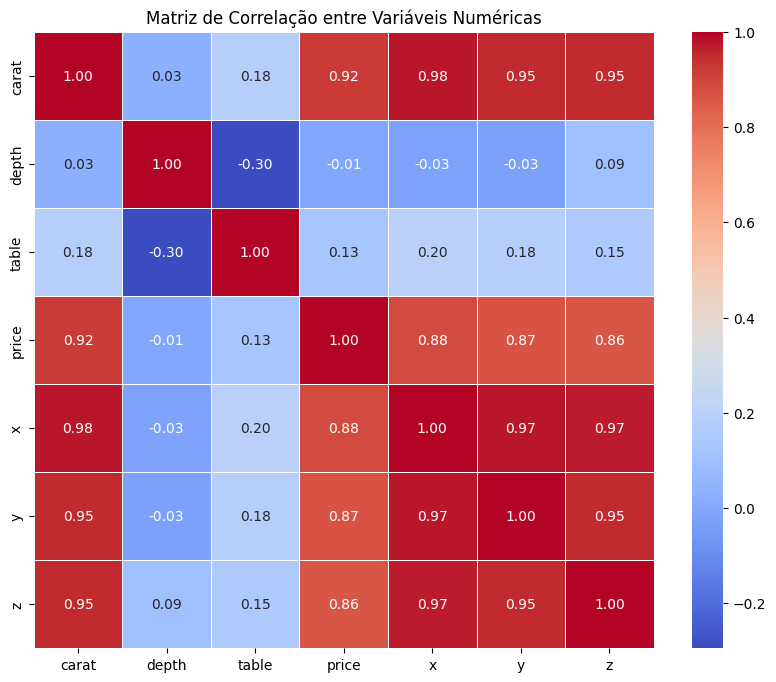

In [30]:
# Matriz de correlação entre as variáveis numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

Com base na matriz de correlação entre as variáveis numéricas do conjunto de dados de diamantes, podemos observar que o peso do diamante (carat) apresenta uma forte correlação positiva com o preço, o que indica que diamantes mais pesados tendem a ter preços mais altos.  Por outro lado, a profundidade (depth) e a tabela (table) mostram correlações mais fracas com o preço, sugerindo que essas características podem ter uma influência menor sobre o preço do diamante em comparação com o peso e as dimensões.

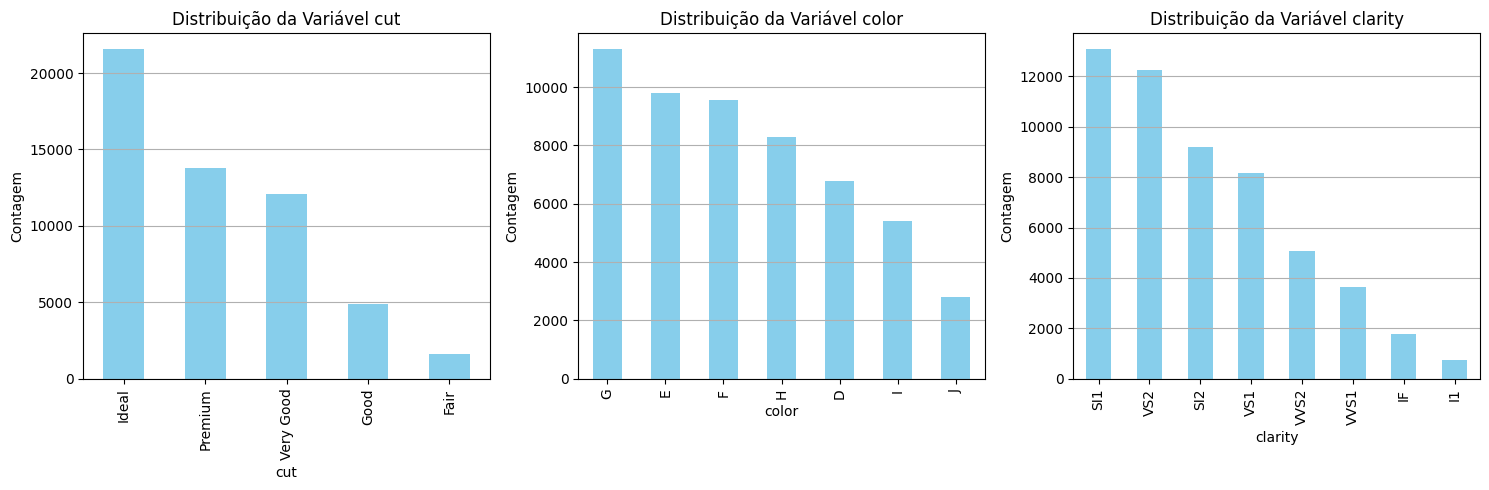

In [31]:
# Gráficos para visualizar a distribuição das variáveis categóricas
columns = ['cut', 'color', 'clarity']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(columns):

    col_counts = df[col].value_counts()

    # Criar o gráfico de barras
    ax = axs[i]
    col_counts.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Distribuição da Variável {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Contagem')
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

Ao analisar as variáveis categóricas do conjunto de dados de diamantes, podemos compreender sua dimensionalidade, relevância e as características predominantes entre os diamantes. Essas percepções são cruciais para prosseguir com o processo, pois nos ajudam a entender a distribuição dos dados e a importância de cada atributo. Além disso, é essencial tratar os dados categóricos adequadamente para evitar que influenciem negativamente o treinamento dos modelos de machine learning.

#Preparação de Dados


### Tratamento de valores inconsistentes

In [32]:
# Encontrar valores iguais a 0 no dataset
valores_zero = (df == 0)

valores_zero_linhas = df[valores_zero.any(axis=1)]

qtd_linhas_com_zero = valores_zero_linhas.shape[0]

porcentagem_zero = (qtd_linhas_com_zero / df.shape[0]) * 100

# Exibir os resultados encontrados
print("Linhas com pelo menos um valor igual a zero:")
print(valores_zero_linhas)

print("\nQuantidade de linhas com pelo menos um valor igual a zero:", qtd_linhas_com_zero)

print("Porcentagem em relação ao total de linhas do DataFrame: {:.2f}%".format(porcentagem_zero))

Linhas com pelo menos um valor igual a zero:
       carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium     I     SI1   61.

In [33]:
# Excluir as linhas com pelo menos 1 valor zero

df2 = df.copy()

indices_zero = df2[(df2['x'] == 0) | (df2['y'] == 0) | (df2['z'] == 0)].index

df2 = df2.drop(indices_zero)

In [34]:
# Resultado da exclusão anterior

linhas_df1 = len(df)
linhas_df2 = len(df2)

print(f"Foram excluídas {linhas_df1 - linhas_df2} linhas do dataset")

Foram excluídas 20 linhas do dataset


Como vimos anteriormente, o dataset original apresentou valores zerados para algumas medidas de tamanho dos diamantes. As linhas foram excluídas por se tratarem de medidas fundamentais dos diamantes, como comprimento, largura e altura (representadas pelas colunas 'x', 'y' e 'z'). Esses valores são incomuns e podem indicar dados ausentes ou incorretos. Manter essas linhas poderia distorcer nossas análises e os resultados do modelo, já que essas medidas são cruciais para entender as características físicas dos diamantes. Portanto, para garantir a integridade e a precisão dos nossos dados, decidi remover essas linhas. Isso nos permite realizar uma análise mais confiável e obter resultados mais precisos em nossas investigações sobre os diamantes.

### Tratamento das variáveis categóricas

In [35]:
#Tratamento das variáveis categóricas com o OneHotEncoder

df2 = df2.reset_index(drop=True)

X_categorical = df2[['cut', 'color', 'clarity']]

categorical_encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = categorical_encoder.fit_transform(X_categorical)

X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded.toarray(), columns=categorical_encoder.get_feature_names_out(['cut', 'color', 'clarity']))

df2.drop(columns=['cut', 'color', 'clarity'], inplace=True)

df_encoded = pd.concat([df2, X_categorical_encoded_df], axis=1)

display(df_encoded.head())

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


As variáveis categóricas foram tratadas com o OneHotEncoder para convertê-las em um formato adequado para os algoritmos de aprendizado de máquina. Isso é crucial porque muitos algoritmos de aprendizado de máquina não podem lidar diretamente com variáveis categóricas em seu formato original e exigem que todas as características sejam numéricas. Portanto, este tratamento vai permitir que os modelos capturem efetivamente as relações entre as categorias e a variável alvo durante o treinamento do modelo.

### Seleção de características

In [36]:
# Feature Selection utilizando o algoritmo LinearRegression

modelo_regressao = LinearRegression()

# Separar as características (X) e a variável alvo (y)
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Treinar o modelo de regressão linear
modelo_regressao.fit(X_normalized, y)

coeficientes = modelo_regressao.coef_

df_coeficientes = pd.DataFrame({'Característica': X.columns, 'Coeficiente': coeficientes})

# Ordenar as características por coeficiente absoluto
df_coeficientes['Coef_absoluto'] = abs(df_coeficientes['Coeficiente'])
df_coeficientes = df_coeficientes.sort_values(by='Coef_absoluto', ascending=False)

print(df_coeficientes)

   Característica  Coeficiente  Coef_absoluto
0           carat  5460.757941    5460.757941
3               x -1232.116547    1232.116547
21    clarity_SI2  -490.185788     490.185788
18     clarity_I1  -467.144640     467.144640
17        color_J  -388.521352     388.521352
25   clarity_VVS2   271.698148     271.698148
16        color_I  -253.456763     253.456763
24   clarity_VVS1   247.176224     247.176224
19     clarity_IF   236.422365     236.422365
11        color_D   207.943601     207.943601
22    clarity_VS1   203.102073     203.102073
12        color_E   161.372758     161.372758
20    clarity_SI1  -146.889855     146.889855
13        color_F   137.369998     137.369998
15        color_H  -127.144675     127.144675
6        cut_Fair  -122.054575     122.054575
23    clarity_VS2   107.174559     107.174559
1           depth   -93.210699      93.210699
5               z   -80.776793      80.776793
14        color_G    61.113382      61.113382
2           table   -59.077217    

As colunas 'depth', 'z', 'color_G', 'table', 'cut_Ideal', 'cut_Good', 'y','cut_Premium' e 'cut_Very Good' serão desconsideradas devido aos seus coeficientes de magnitude baixa em comparação com outras características. Isso sugere que essas características têm uma influência baixa no preço do diamante, de acordo com o modelo de regressão linear. Portanto, remover essas características pode simplificar o modelo sem perder muita informação.

In [37]:
# Remover as colunas
colunas_remover_adicionais = ['depth','z','color_G','table','cut_Ideal','cut_Good','y','cut_Premium','cut_Very Good']

df_limpo = df_encoded.drop(columns=colunas_remover_adicionais)

### Divisão entre treino e teste

In [38]:
# Dividir os dados em conjuntos de treinamento e teste usando holdout
test_size = 0.20
seed = 7
num_particoes = 10

X = df_limpo.drop(columns=['price'])
y = df_limpo['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed)

# Criar os folds para a validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)

### Normalização dos dados

Considerando que os dados do dataset apresentam escalas diferentes, decidi normalizar os dados. Isso garante que todas as variáveis tenham escalas semelhantes, facilitando o treinamento dos modelos e a interpretação dos resultados.

In [39]:
# Normalizar os dados de treinamento e teste
scaler_normalizado = MinMaxScaler()

X_train_normalizado = scaler_normalizado.fit_transform(X_train)
X_test_normalizado = scaler_normalizado.transform(X_test)

#Modelagem e treinamento:

### Comparação entre modelos de regressão linear

LR: MSE médio 1303257.61 - RMSE médio 1141.35
Ridge: MSE médio 1307795.25 - RMSE médio 1143.36
Lasso: MSE médio 1310131.14 - RMSE médio 1144.39
KNN: MSE médio 425505.26 - RMSE médio 651.45
CART: MSE médio 595559.21 - RMSE médio 771.48


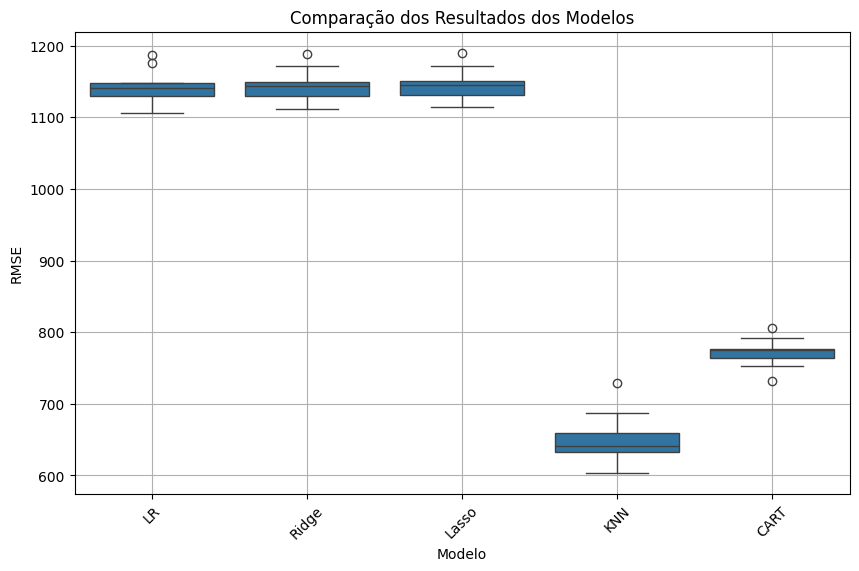

In [40]:
# Definir os modelos de regressão
models = [
    ('LR', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNN', KNeighborsRegressor()),
    ('CART', DecisionTreeRegressor())
]

# Lista para armazenar os resultados dos modelos
resultados_mse = []
resultados_rmse = []

# Avaliar um modelo por vez
for nome, modelo in models:

    scores = cross_val_score(modelo, X_train_normalizado, y_train, cv=kfold, scoring='neg_mean_squared_error')

    # Calcular o MSE e RMSE
    mse = -scores
    resultados_mse.append((nome, mse))

    rmse = np.sqrt(-scores)
    resultados_rmse.append((nome, rmse))

    print(f"{nome}: MSE médio {mse.mean():.2f} - RMSE médio {rmse.mean():.2f}")

# Boxplot de comparação dos modelos

df_resultados = pd.DataFrame([(modelo, rmse) for modelo, rmse_list in resultados_rmse for rmse in rmse_list], columns=['Modelo', 'RMSE'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Modelo', y='RMSE', data=df_resultados)
plt.title('Comparação dos Resultados dos Modelos')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Escolhi 5 algoritmos de regressão diferentes para este projeto com o intuito de explorar diversas abordagens na previsão do preço dos diamantes.

Inicialmente, a regressão linear foi selecionada devido à sua simplicidade e capacidade de fornecer insights sobre as relações lineares entre as características dos diamantes e seus preços. Em seguida, os modelos Ridge e Lasso foram incluídos para lidar com problemas como multicolinearidade e seleção de features, visando aprimorar a generalização do modelo.

O algoritmo KNN (K-Nearest Neighbors) foi escolhido por sua habilidade em capturar padrões complexos e não lineares nos dados, considerando a proximidade dos vizinhos mais próximos para fazer previsões. Por fim, a árvore de decisão (CART) foi adotada devido à sua capacidade de lidar com interações complexas entre as características e capturar relações não lineares.





Com base nos resultados da validação cruzada, podemos observar que o algoritmo KNN (K-Nearest Neighbors) obteve o menor RMSE médio, com um valor de aproximadamente 651,45. Isso indica que, em média, as previsões desse modelo estão mais próximas dos valores reais do que as previsões dos outros modelos testados.

#Avaliação de Resultados:

### Treinando o modelo com a base de treino e testando com a base de teste

In [41]:
# Treinar o modelo KNN
modelo_knn = KNeighborsRegressor()
modelo_knn.fit(X_train_normalizado, y_train)

# Prever os valores para o conjunto de teste
y_pred_knn = modelo_knn.predict(X_test_normalizado)

# Métricas de avaliação
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN:")
print("MSE: %.2f" % mse_knn)
print("RMSE: %.2f" % rmse_knn)
print("MAE: %.2f" % mae_knn)
print("MAPE: %.2f%%" % mape_knn)
print("R2 Score: %.2f" % r2_knn)

KNN:
MSE: 461687.25
RMSE: 679.48
MAE: 324.39
MAPE: 0.09%
R2 Score: 0.97


As medidas de avaliação escolhidas, como MSE, RMSE, MAE, MAPE e R² Score, oferecem diferentes perspectivas sobre o desempenho do modelo de regressão. O MSE e RMSE quantificam o erro médio das previsões, enquanto o MAE e MAPE fornecem insights sobre a magnitude dos erros absolutos e relativos. Por fim, o R² Score indica a variabilidade dos dados explicada pelo modelo. Juntas, essas medidas proporcionam uma avaliação abrangente do modelo, permitindo a compreensão de sua eficácia e capacidade de generalização.



Com base na avaliação do modelo KNN para prever o preço dos diamantes, podemos concluir que o modelo apresenta um desempenho altamente satisfatório. Os resultados das métricas de avaliação, incluindo MSE, RMSE, MAE, MAPE e R2 Score, indicam que o modelo KNN é capaz de fazer previsões precisas e explicar uma grande parte da variabilidade nos dados. O MSE e o RMSE, que são indicadores de precisão, são relativamente baixos, sugerindo que as previsões do modelo têm um erro médio baixo em relação aos valores reais. Além disso, o R2 Score próximo de 1 sugere que o modelo é altamente explicativo em termos da relação entre as variáveis independentes e a variável dependente.

É importante observar que, no código anterior, onde avaliamos qual seria o melhor algoritmo a ser utilizado, empregamos validação cruzada com os dados de treinamento e obtivemos um RMSE de 651,45 para o KNN. Agora, neste segundo código, onde treinamos o modelo KNN com a base de treinamento e o testamos com a base de teste, observamos um RMSE de 679,48. É comum que o desempenho nos dados de treinamento seja ligeiramente superior ao dos dados de teste. No entanto, pretendo otimizar os hiperparâmetros no próximo código para tentar reduzir essa diferença.

### Otimizando os hiperparâmetros

In [42]:
# Definir os parâmetros a serem testados e treinar o modelo utilizando os novos hiperparâmetros
parametros = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

modelo_knn = KNeighborsRegressor()

grid_search = GridSearchCV(modelo_knn, parametros, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_normalizado, y_train)

print("Melhores hiperparâmetros:", grid_search.best_params_)

# Fazer previsões com os dados de teste usando o modelo otimizado
y_pred_knn = grid_search.predict(X_test_normalizado)

# Avaliar o modelo com os dados de teste
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN (com hiperparâmetros otimizados):")
print("MSE: %.2f" % mse_knn)
print("RMSE: %.2f" % rmse_knn)
print("MAE: %.2f" % mae_knn)
print("MAPE: %.2f%%" % mape_knn)
print("R2 Score: %.2f" % r2_knn)

Melhores hiperparâmetros: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
KNN (com hiperparâmetros otimizados):
MSE: 461687.25
RMSE: 679.48
MAE: 324.39
MAPE: 0.09%
R2 Score: 0.97


Após otimizar os hiperparâmetros do modelo KNN com GridSearchCV, obtivemos resultados iguais aos anteriores. Isso sugere que os parâmetros padrão do modelo já estavam bem ajustados aos dados. O melhor conjunto de hiperparâmetros encontrado foi a distância euclidiana, 5 vizinhos mais próximos e pesos uniformes. Isso indica que a otimização adicional não resultou em melhorias significativas na performance do modelo.

### Análise Gráfica de Desempenho:

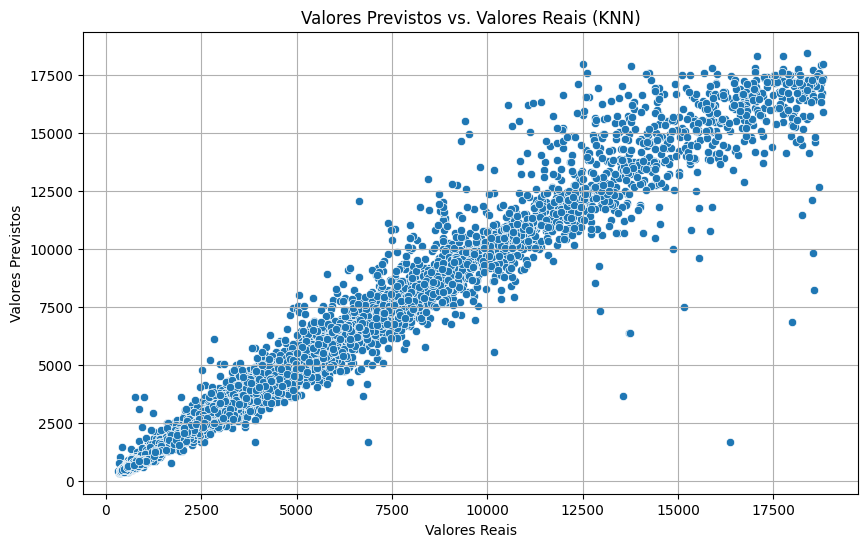

In [43]:
# Gráfico de dispersão
dados = pd.DataFrame({'Valores Reais': y_test, 'Valores Previstos': y_pred_knn})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='Valores Reais', y='Valores Previstos')
plt.title('Valores Previstos vs. Valores Reais (KNN)')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.grid(True)
plt.show()

No gráfico de dispersão, notamos uma diagonal evidente, indicando que nossas previsões estão alinhadas com os valores reais. Isso significa que, em geral, nosso modelo está acertando nas previsões. No entanto, ao observar os valores mais altos, percebemos que a dispersão dos pontos é um pouco maior quando comparamos com a dispersão dos valores menores. Isto sugere que o modelo pode ter mais dificuldade em prever com precisão os valores mais altos.

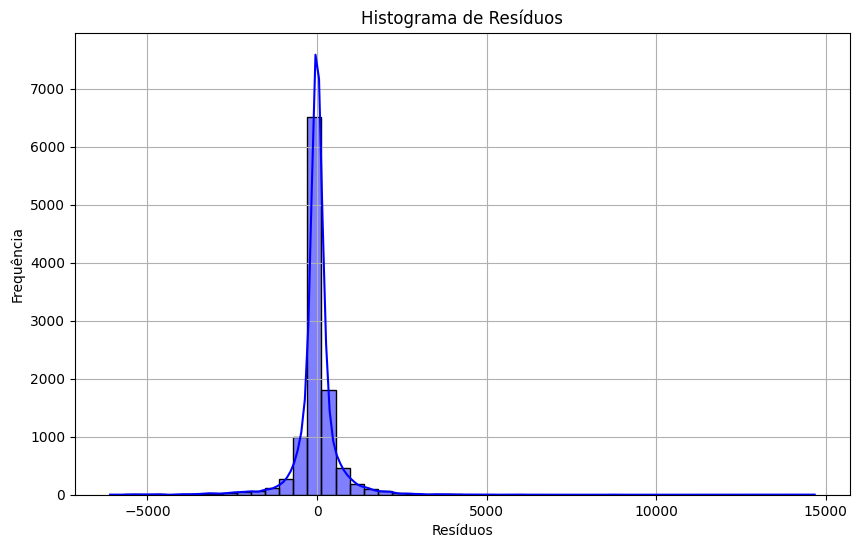

In [44]:
# Histograma dos resíduos
residuos = y_test - y_pred_knn

plt.figure(figsize=(10, 6))
sns.histplot(residuos, bins=50, color='blue', edgecolor='black', kde=True)
plt.title('Histograma de Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Com base no histograma das diferenças entre os valores previstos e reais, podemos notar que essas diferenças estão concentradas na faixa de valores em torno de zero, indicando que, em média, o modelo está acertando razoavelmente bem. À medida que nos afastamos desses valores, a frequência de diferenças diminui, indicando que o modelo tem menos previsões com diferenças significativas em relação aos valores reais. Isso sugere que o modelo tem um desempenho razoável, mas ainda há espaço para melhorias.

# Conclusão

Neste projeto, busquei compreender e prever o preço dos diamantes com base em suas características. Utilizei um conjunto de dados abrangente contendo informações como carat, cut, color e clarity dos diamantes. Meu principal objetivo foi desenvolver um modelo de regressão capaz de prever com precisão o preço dos diamantes com base nessas características.

Realizei uma análise exploratória dos dados para entender sua estrutura, distribuições e presença de valores ausentes. Além disso, tratei variáveis categóricas, como cut, color e clarity, utilizando técnicas como codificação one-hot para incorporá-las ao modelo, normalizei os dados e realizei uma seleção de features para identificar as características mais relevantes para a previsão do preço dos diamantes.

Em seguida, vários modelos de regressão foram treinados, incluindo regressão linear, ridge, lasso e knn, para comparar seus desempenhos em prever o preço dos diamantes. O desempenho de cada modelo foi avaliado usando métricas como MSE, RMSE, MAE, MAPE e R². O algoritmo escolhido foi o KNN.

Os resultados mostraram que o modelos foi capaz de prever razoavelmente bem o preço dos diamantes, com um R² de 0.97, indicando uma boa capacidade de generalização.

Conforme observado na seleção de características, identifiquei a magnitude da relação entre cada característica e a variável alvo. O peso em quilates (carat) mostrou ser a característica mais influente no preço do diamante, indicando que o preço tende a aumentar significativamente com o aumento do peso em quilates. Além disso, características relacionadas à clareza e cor do diamante também têm uma influência considerável no preço. Por outro lado, características como qualidade do corte (cut) e dimensões (x, y, z) têm coeficientes menores em comparação com peso, clareza e cor, sugerindo que sua influência no preço pode ser menos significativa.

Os resultados confirmaram as premissas iniciais do projeto e destacaram a importância das características específicas na determinação do preço dos diamantes.



Para futuras melhorias, recomendo a obtenção de mais dados, especialmente em relação a características menos representadas, como determinadas cores ou níveis de claridade. Além disso, uma análise mais aprofundada das relações entre as características dos diamantes pode fornecer insights adicionais e levar a melhorias no modelo.